# TDA@HSE
## Seminar 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from numpy.linalg import matrix_rank
from scipy.linalg import block_diag

import simplicial
import simplicial.drawing

Simplicial fixed for Python 3


In [ ]:
D1 = np.array([
    [1, 1, 0, 0, 0],
    [-1, 0, 1, 1, 0],
    [0, 0, -1, 0, 1],
    [0, -1, 0, -1, -1]
])
c_oriented = np.array([1, 0, 0, 1, -1])
z_oriented = np.array([1, -1, 1, 0, 1])
D1 @ c_oriented, D1 @ z_oriented

## Computing simplicial homology

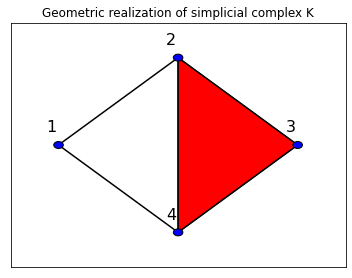

In [5]:
# create simplicial complex
K = simplicial.SimplicialComplex()

# add 0-simplices (vertices)
v1 = K.addSimplex(id="1")
v2 = K.addSimplex(id="2")
v3 = K.addSimplex(id="3")
v4 = K.addSimplex(id="4")

# add 1-simplices (edges)
K.addSimplex(['1', '2'], id="12")
K.addSimplex(['1', '4'], id="14")
K.addSimplex(['2', '3'], id="23")
K.addSimplex(['2', '4'], id="24")
K.addSimplex(['3', '4'], id="34")

# add 2-simplices (triangles)
K.addSimplex(['23', '24', '34'], id="234")

# positions
offset = (-0.05, 0.075)
pos = [(0.0, 0.5), (0.5, 1.0), (1.0, 0.5), (0.5, 0.0)]

# set positions for vertices
em = simplicial.Embedding(K)
em.positionSimplex(v1, pos[0])
em.positionSimplex(v2, pos[1])
em.positionSimplex(v3, pos[2])
em.positionSimplex(v4, pos[3])

# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Spaces of simplices

Given a simplicial complex $K = \{\emptyset, 1, 2, 3, 4, 12, 14, 23, 24, 34, 234\}$ its spaces of simplices are

$$
\begin{align}
\Delta_0 &= \{0, 1, 2, 3\}\\
\Delta_1 &= \{12, 14, 23, 24, 34 \}\\
\Delta_2 &= \{234 \}
\end{align}
$$

### Chain spaces

Chain space $C_k$ is defined as a formal sum of $k$-simplicies with coefficients in a field $\mathbb{k}$

$$c_k = \sum_i \alpha \sigma_i \in C_k,~\textrm{where}~\sigma_i \in \Delta_k, \alpha \in \mathbb{k}$$

#### Examples

Vertex chains $C_0$

$$
c_0 = [0] \sim [0 * 1 + 0 * 2 + 0 * 3 + 0 * 4]\\
c_0' = [1 + 2 + 4] ~ [1 * 1 + 1 * 2 + 0 * 3 + 1 * 4]
$$

Edge chains $C_1$

$$
c_1 = [12 + 23 + 34]\\
c_1' = [12 + 14 + 23 + 34]
$$

Triangle chains $C_2$

$$
c_2 = [234]\\
$$

#### Summation

One can take sums of chains, over $\mathbb{Z}_2$ the summation is defined modulo 2

$$
\begin{align}
c_1 + c_1' &= [12 + 23 + 34] + [12 + 14 + 24 + 34]\\
&= [14 + 23 + 24]
\end{align}
$$

In [ ]:
# 12, 14, 23, 24, 34
c1 = np.array([1, 0, 1, 0, 1])
c1_prime = np.array([1, 1, 0, 1, 1])
(c1 + c1_prime) % 2

In [ ]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Boundary operator

Given a $k$-simplex $\sigma = [v_0, v_1, \dots, v_k] \in \Delta_k$ its boundary $\partial_k \sigma \in C_{k-1}$ is defined

$$\partial_k \sigma = \sum_{i=0}^k~[v_0, v_1, \dots, v_i, v_{i+1}, \dots, v_k]$$

#### Examples

Edge

$$c_1 = 12\\
\partial c_1 = 2 + 1$$

Triangle

$$c_2 = 234\\
\partial c_2 = 34 + 24 + 23$$

#### Matrix representation

Boundary operator $\partial_k$ for a fixed basis can be represented by a matrix $\mathbf{B}_k$ having $k$-simplices $\sigma$ on columns and $k-1$-simplices $\tau$ on rows and $b_{ij} = 1$ if $\tau$ is in a boundary of $\sigma$.

In [3]:
# 12, 14, 23, 24, 34 -- columns
# 1, 2, 3, 4 -- rows
B1 = np.array([
    [1, 1, 0, 0, 0],
    [1, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1]
])

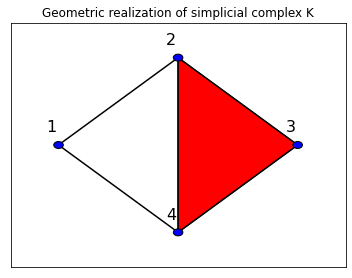

In [6]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Boundaries of chains

#### Boundary of a chain

Boundary operator is linear

$$
\begin{align}
c &= 12 + 24 + 34\\\\
\partial c &= \partial(12 + 24 + 34)\\
\partial c &= \partial(12) + \partial(24) + \partial(34)\\
\partial c &= (2 + 1) + (4 + 2) + (4 + 3)\\
\partial c &= 1 + 3
\end{align}
$$

In [7]:
c = np.array([1, 0, 0, 1, 1]) # 1*12 + 0*14 + 0*23 + 1*24 + 1*34
B1 @ c % 2

array([1, 0, 1, 0])

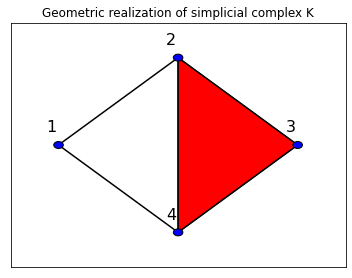

In [8]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

In [9]:
D1 = np.array([
    [1, 1, 0, 0, 0],
    [-1, 0, 1, 1, 0],
    [0, 0, -1, 0, 1],
    [0, -1, 0, -1, -1]
])
# 12, 14, 23, 24, 34 -- columns
c_oriented = np.array([1, 0, 0, 1, -1])
z_oriented = np.array([1, -1, 1, 0, 1])
D1 @ c_oriented, D1 @ z_oriented

(array([ 1,  0, -1,  0]), array([0, 0, 0, 0]))

#### Boundary of a cycle

$$
\begin{align}
z &= 12 + 14 + 23 + 34\\\\
\partial z &= \partial(12) + \partial(14) + \partial(23) + \partial(34)\\
\partial z &= (2 + 1) + (4 + 1) + (2 + 3) + (4 + 3)\\
\partial z &= 0
\end{align}
$$

In [10]:
z = np.array([1, 1, 1, 0, 1])
B1 @ z % 2

array([0, 0, 0, 0])

#### Exercise

Find the boundary of the other cycle in the complex $K$.

In [11]:
z_prime = # your code here
boundary = # check if z_prime boundary is zero

array([0, 0, 0, 0])

### Chain complex

Chain complex is a sequence of chain spaces connected with boundary maps

$$C_2 \xrightarrow{\partial_2} C_1  \xrightarrow{\partial_1} C_0$$

For a given chain space $C_k$ the space of cycles $Z_k$ consists of all elements of $C_k$ which boundary $\partial_k$ is zero.

$$
\begin{align}
Z_k &= \mathrm{ker}~\partial_k\\
Z_k &= \{ c \in C_k \mid \partial_k = 0 \}\\\\
B_k &= \mathrm{im}~\partial_{k+1}\\
B_k &= \{ c \in C_k \mid \partial_{k+1}d = c,~\mathrm{for~some}~d \in C_{k+1} \}
\end{align}
$$

Hierarchy of spaces

$$B_k \subseteq Z_k \subseteq C_k$$

In [ ]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Cycles and boundaries groups of $K$

$$Z_1 = \{ [12 + 14 + 24], [23 + 24 + 34], [12 + 14 + 23 + 34] \}$$
$$B_1 = \{[23 + 24 + 34]\}$$

#### Homologous cycles

Two cycles $c_1$ and $c_2$ are said homologous $c_1 \sim c_2$ if their difference $c_1 - c_2 \in B_k$.

In [ ]:
# 12, 14, 23, 24, 34
z1 = np.array([1, 1, 0, 1, 0])
z2 = np.array([1, 1, 1, 0, 1])

In [ ]:
(z1 - z2) % 2 # 0*12 + 0*14 + 23 + 24 + 34

#### Homology group

$$
\begin{align}
H_k &= \mathrm{ker}~\partial_k~/~\mathrm{im}~\partial_{k+1}\\
H_k &= Z_k~/~B_k
\end{align}
$$

#### Naive algorithm

Check for all cycles in $Z_k$ where their difference is an element (or combination) of $B_k$.

## Algorithms for computing homology

### Ranks

Field $\mathbb{Z}$.

Given a simplicial complex $K$ with f-vector $\mathbf{f}$, boundary matrices $\mathrm{B}_k$ and $\mathrm{B}_{k+1}$ the $k$-the Betti number, i.e. the rank of $k$-th homology group $H_k$ is

\begin{equation}
\beta_k = \mathbf{f}_k - \mathrm{rank}\mathbf{B}_k - \mathrm{rank}\mathbf{B}_{k+1}.
\end{equation}

#### Boundary matrix 

In [ ]:
# oriented, field Z
D0 = np.array([[0, 0, 0, 0]]) # 1, 2, 3, 4
D1 = np.array([
    [1, 1, 0, 0, 0],
    [-1, 0, 1, 1, 0],
    [0, 0, -1, 0, 1],
    [0, -1, 0, -1, -1]
])
D2 = np.array([[0, 0, -1, 1, -1]]).T # 234

In [ ]:
# your code here

### Hodge Laplacian eigendecomposition

$k$-th Hodge Laplacian is defined

\begin{equation}
\mathbf{L}_k = \mathbf{B}_k^T \mathbf{B}_k + \mathbf{B}_{k+1} \mathbf{B}_{k+1}^T,
\end{equation}

then the $k$-the Betti number is the number of zero eigenvalues of $\mathbf{L}_k$.

In [ ]:
# your code here

### Boundary matrix reduction

Ring $\mathbb{Z}2$

![Matrix reduction](./img/reduction.png)

In [ ]:
# non-oriented, ring Z0
B0 = np.array([[0, 0, 0, 0]]) # 1, 2, 3, 4
B1 = np.array([
    [1, 1, 0, 0, 0],
    [1, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1]
]) # 12, 14, 23, 24, 34
B2 = np.array([[0, 0, 1, 1, 1]]).T # 234
B = block_diag(B0, B1, B2)

In [ ]:
B

In [ ]:
# your code here
R = #???